In [13]:
import numpy as np
import matplotlib.pyplot as plt
#v int array from 1 to 40
vs = np.arange(1, 41)
#create a empty array ln
ln = np.zeros_like(vs, dtype=float)

lr = 1.39
lf = 1.55
Ca = 20000
Iz = 25854
m = 1888.6


#for xdot=2,5 and 8 , P and Q matrix
xdots=[2,5,8]
for xdot in xdots:
    A = np.array([[0, 1, 0, 0], [0, -4*Ca / (m * xdot), 4*Ca / m, -(2*Ca*(lf - lr))/(m*xdot)], [0, 0, 0, 1], [0, -(2*Ca*(lf - lr)) / (Iz * xdot), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(np.power(lf, 2) + np.power(lr, 2))) / (Iz * xdot)]])
    B = np.array([[0], [2*Ca / m], [0], [(2 * Ca* lf) / Iz]])
    C1 = np.array([[1, 0, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])
    C2 = np.array([[0, 0, 0, 0], [0, 1, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])
    C3 = np.array([[0, 0, 0, 0], [0, 0, 0, 0],[0, 0, 1, 0],[0, 0, 0, 0]])
    C4 = np.array([[0, 0, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 1]])
    #make an array of C which is a combination of C1,C2,C3 and C4
    
     
    p = np.hstack([B, A @ B, A @ A @ B, A @ A @ A @ B])
    
    #and the rank of the matrix
    print("For xdot=",xdot)
    print("Rank of P matrix ", np.linalg.matrix_rank(p))
    
    print("P matrix")
    print(p)

    print("If we are measuring E1")
    q1=np.vstack([C1, C1 @ A, C1 @ A @ A, C1 @ A @ A @ A])
    print("Rank of Q matrix",np.linalg.matrix_rank(q1))
    print("Q matrix")
    print(q1)
    print(end="\n\n")

    print("If we are measuring E1dot")
    q2=np.vstack([C2, C2 @ A, C2 @ A @ A, C2 @ A @ A @ A])
    print("Rank of Q matrix",np.linalg.matrix_rank(q2))
    print("Q matrix")
    print(q2)
    print(end="\n\n")

    print("If we are measuring E2")
    q3=np.vstack([C3, C3 @ A, C3 @ A @ A, C3 @ A @ A @ A])
    print("Rank of Q matrix",np.linalg.matrix_rank(q3))
    print("Q matrix")
    print(q3)
    print(end="\n\n")

    print("If we are measuring E2dot")
    q4=np.vstack([C4, C4 @ A, C4 @ A @ A, C4 @ A @ A @ A])
    print("Rank of Q matrix",np.linalg.matrix_rank(q4))
    print("Q matrix")
    print(q4)
    print(end="\n\n")

For xdot= 2
Rank of P matrix  4
P matrix
[[ 0.00000000e+00  2.11797098e+01 -4.52643363e+02  9.70650280e+03]
 [ 2.11797098e+01 -4.52643363e+02  9.70650280e+03 -2.06189084e+05]
 [ 0.00000000e+00  2.39808153e+00 -1.06625495e+01  9.23711699e+01]
 [ 2.39808153e+00 -1.06625495e+01  9.23711699e+01 -1.51376540e+03]]
If we are measuring E1
Rank of Q matrix 4
Q matrix
[[   1.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            1.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.        ]
 [   0.          -21.17970984   42.35941968   -1.69437679]
 [   0.            0.            0.            0.        ]
 [   0.            0.            0.            0.

We find that if we measure E1 we find the system to be observable



Text(0, 0.5, 'Log of singular value ratio')

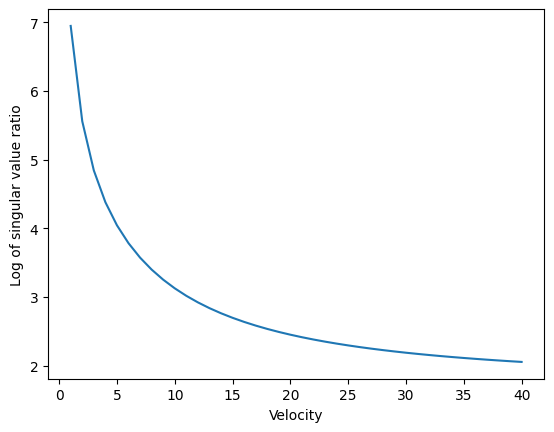

In [14]:
##The variation of the log of the ratio of the largest singular value to the smallest singular value of the matrix P with respect to the velocity v
for i in range(len(vs)):
    #create matrix a and b
    xdot = vs[i]
    A = np.array([[0, 1, 0, 0], [0, -4*Ca / (m * xdot), 4*Ca / m, -(2*Ca*(lf - lr))/(m*xdot)], [0, 0, 0, 1], [0, -(2*Ca*(lf - lr)) / (Iz * xdot), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(np.power(lf, 2) + np.power(lr, 2))) / (Iz * xdot)]])
    B = np.array([[0], [2*Ca / m], [0], [(2 * Ca* lf) / Iz]])
    C = np.identity(4)
    D=np.zeros((4,1))
    #create matrix p
    p = np.hstack([B, A @ B, A @ A @ B, A @ A @ A @ B])
    #find the smallest and largest singular value
    u,s,v=np.linalg.svd(p)
    #append log to base 10 of the ratio of the largest singular value to the smallest singular value to ln
    ln[i] = np.log10(s[0]/s[-1])
    
plt.plot(vs, ln)
plt.xlabel('Velocity')
plt.ylabel('Log of singular value ratio')


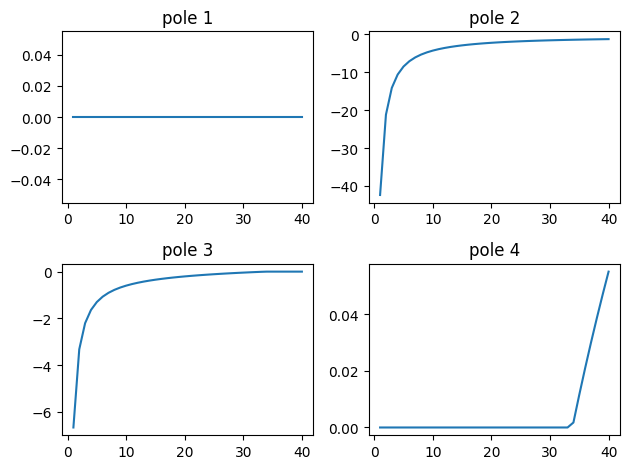

In [15]:

##the
from sympy import symbols

import control

p1 = []
p2 = []
p3 = []
p4 = []
lr = 1.39
lf = 1.55
Ca = 20000
Iz = 25854
m = 1888.6
for i in range(1,41):
    # create matrix a and b
    xdot = i
    A = np.array([[0, 1, 0, 0], [0, -4*Ca / (m * xdot), 4*Ca / m, -(2*Ca*(lf - lr))/(m*xdot)], [0, 0, 0, 1], [0, -(2*Ca*(lf - lr)) / (Iz * xdot), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(np.power(lf, 2) + np.power(lr, 2))) / (Iz * xdot)]])
    B = np.array([[0], [2*Ca / m], [0], [(2 * Ca* lf) / Iz]])
    C = np.identity(4)
    D=np.zeros((4,1))
    sys = control.StateSpace(A, B, C, D)
   
    poles = control.poles(sys)
    # append the real part of the poles to p1, p2, p3, p4
    p1.append(np.real(poles[0]))
    p2.append(np.real(poles[1]))
    p3.append(np.real(poles[2]))
    p4.append(np.real(poles[3]))

         
    
# plot the plots as 4 subplots vs velocity
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(vs, p1)
plt.title('pole 1')
plt.subplot(2, 2, 2)
plt.plot(vs, p2)
plt.title('pole 2')
plt.subplot(2, 2, 3)
plt.plot(vs, p3)
plt.title('pole 3')
plt.subplot(2, 2, 4)
plt.plot(vs, p4)
plt.title('pole 4')
plt.tight_layout()
plt.show()
